In [1]:
### Analyse et manipulation des données
import pandas as pd
import numpy as np

### Visualisation de données
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

### Normalisation et modélisation des données avec K-Means et PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



import warnings
warnings.filterwarnings('ignore')

## Chargement des données

In [2]:
df_customers=pd.read_csv('olist_customers_dataset.csv')
df_customers.columns


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [3]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
df_customers['customer_city'].unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [5]:
df_customers['customer_city'] = df_customers['customer_city'].str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8')

In [6]:
df_customers['customer_city'].unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [7]:
df_geolocation=pd.read_csv('olist_geolocation_dataset.csv')
df_geolocation.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [8]:
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [9]:
df_items=pd.read_csv('olist_order_items_dataset.csv')
df_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [10]:
df_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [11]:
df_items[df_items['order_id']=='b81ef226f3fe1789b1e8b2acac839d17']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
80985,b81ef226f3fe1789b1e8b2acac839d17,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.8,19.53


In [12]:
df_payments=pd.read_csv('olist_order_payments_dataset.csv')
df_payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [13]:
df_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [14]:
df_payments[df_payments['order_id']=='b81ef226f3fe1789b1e8b2acac839d17']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [15]:
df_reviews=pd.read_csv('olist_order_reviews_dataset.csv')
df_reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [16]:
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [17]:
df_orders=pd.read_csv('olist_orders_dataset.csv')
df_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [18]:
df_orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [19]:
df_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [20]:
df_orders=df_orders[df_orders['order_status']=='delivered']
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [21]:
df_orders['order_purchase_timestamp']= pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [23]:
df_products=pd.read_csv('olist_products_dataset.csv')
df_products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [24]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [25]:
df_sellers=pd.read_csv('olist_sellers_dataset.csv')
df_sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [26]:
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [27]:
df_category_translation=pd.read_csv('product_category_name_translation.csv')
df_category_translation.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [28]:
df_category_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


## Nettoyage des données

### Fusion des données

In [29]:
df_merge1 = df_items[['order_id','order_item_id', 'product_id']].merge(df_payments[['order_id', 'payment_type', 'payment_installments','payment_value']],on='order_id').merge(df_reviews[['order_id','review_score']],on='order_id').merge(df_orders[['order_id','customer_id','order_purchase_timestamp']],on='order_id')
df_merge1

,order_id,order_item_id,product_id,payment_type,payment_installments,payment_value,review_score,customer_id,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,credit_card,2,72.19,5,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,credit_card,3,259.83,4,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,credit_card,5,216.87,5,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,credit_card,2,25.78,4,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,credit_card,3,218.04,5,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51
...,...,...,...,...,...,...,...,...,...
114854,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,boleto,1,343.40,5,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23 13:57:06
114855,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,boleto,1,386.53,5,84c5d4fbaf120aae381fad077416eaa0,2018-07-14 10:26:46
114856,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,credit_card,3,116.85,5,29309aa813182aaddc9b259e31b870e6,2017-10-23 17:07:56
114857,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,credit_card,3,64.71,5,b5e6afd5a41800fdf401e0272ca74655,2017-08-14 23:02:59


In [30]:
df_merge2 = df_customers[['customer_id', 'customer_unique_id','customer_state']].merge(df_merge1, on='customer_id')
df_merge2

,customer_id,customer_unique_id,customer_state,order_id,order_item_id,product_id,payment_type,payment_installments,payment_value,review_score,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,1,a9516a079e37a9c9c36b9b78b10169e8,credit_card,2,146.87,4,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP,29150127e6685892b6eab3eec79f59c7,1,4aa6014eceb682077f9dc4bffebc05b0,credit_card,8,335.48,5,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,1,bd07b66896d6f1494f5b86251848ced7,credit_card,7,157.73,5,2018-05-19 16:07:45
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,1,a5647c44af977b148e0a3a4751a09e2e,credit_card,1,173.30,5,2018-03-13 16:06:38
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,1,9391a573abe00141c56e38d84d7d5b3b,credit_card,8,252.25,5,2018-07-29 09:51:30
...,...,...,...,...,...,...,...,...,...,...,...
114854,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,SP,6760e20addcf0121e9d58f2f1ff14298,1,ccb4503d9d43d245d3b295d0544f988b,credit_card,6,88.78,4,2018-04-07 15:48:17
114855,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,1,9ede6b0570a75a4b9de4f383329f99ee,credit_card,3,129.06,5,2018-04-04 08:20:22
114856,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,CE,fed4434add09a6f332ea398efd656a5c,1,7a5d2e1e131a860ae7d18f6fffa9d689,credit_card,5,56.04,1,2018-04-08 20:11:50
114857,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,RS,e31ec91cea1ecf97797787471f98a8c2,1,f819f0c84a64f02d3a5606ca95edd272,credit_card,2,711.07,5,2017-11-03 21:08:33


In [31]:
df_merge3=df_merge2.merge(df_products[['product_id', 'product_category_name']], on='product_id').merge(df_category_translation, on='product_category_name')
df_merge3

,customer_id,customer_unique_id,customer_state,order_id,order_item_id,product_id,payment_type,payment_installments,payment_value,review_score,order_purchase_timestamp,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,1,a9516a079e37a9c9c36b9b78b10169e8,credit_card,2,146.87,4,2017-05-16 15:05:35,moveis_escritorio,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,1,a9516a079e37a9c9c36b9b78b10169e8,credit_card,1,275.79,1,2017-11-09 00:50:13,moveis_escritorio,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2,a9516a079e37a9c9c36b9b78b10169e8,credit_card,1,275.79,1,2017-11-09 00:50:13,moveis_escritorio,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,RS,b1a5d5365d330d10485e0203d54ab9e8,1,a9516a079e37a9c9c36b9b78b10169e8,credit_card,7,140.61,3,2017-05-07 20:11:26,moveis_escritorio,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,RJ,2e604b3614664aa66867856dba7e61b7,1,a9516a079e37a9c9c36b9b78b10169e8,credit_card,10,137.58,4,2018-02-03 19:45:40,moveis_escritorio,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113205,8325d6e7af2f2bfb58cf040729b232dd,a1d53377ab83871b0ad483b03ac69d6c,SP,b99217b1fcf2fdeace7b8d869b76cb91,1,57bdf3098169cccdb62221bd3e089cbd,credit_card,3,110.44,5,2018-03-07 17:42:06,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
113206,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,SP,9fa3a005f89a187501fa1bd63d6125fb,1,57bdf3098169cccdb62221bd3e089cbd,credit_card,1,54.09,5,2017-10-08 23:51:49,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
113207,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,RJ,ee86b68eb9222b0cad7da50f4f758a35,1,0ab3ab3b2869073aa9afe795fe9151aa,credit_card,1,124.52,5,2017-05-17 17:44:34,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
113208,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,RO,2c4ada2e75c2ad41dd93cebb5df5f023,1,6c7a0a349ad11817745e3ad58abd5c79,credit_card,1,209.06,4,2017-01-26 11:09:00,seguros_e_servicos,security_and_services


In [32]:
df=df_merge3.copy()

In [33]:
df.head(2)

,customer_id,customer_unique_id,customer_state,order_id,order_item_id,product_id,payment_type,payment_installments,payment_value,review_score,order_purchase_timestamp,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,1,a9516a079e37a9c9c36b9b78b10169e8,credit_card,2,146.87,4,2017-05-16 15:05:35,moveis_escritorio,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,1,a9516a079e37a9c9c36b9b78b10169e8,credit_card,1,275.79,1,2017-11-09 00:50:13,moveis_escritorio,office_furniture


* customer_unique_id = identifiant unique d'un client
* customer_city = ville du client
* order_item_id = numéro séquentiel identifiant le nombre d'articles inclus dans la même commande
* payment_type = moyen de paiement
* payment_installments = nombre de versements choisi par le client
* payment_value = valeur du transaction
* review_score = Note enquête de satisfaction allant de 1 à 5
* order_purchase_timestamp = date de la commande
* product_category_name_english = nom de la catégorie du produit en anglais

### Vérifier les doublons

In [34]:
df.duplicated().sum()

1044

In [35]:
df= df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [36]:
df.groupby(['customer_id']).filter(lambda df:df.shape[0] > 1).tail(10)

,customer_id,customer_unique_id,customer_state,order_id,order_item_id,product_id,payment_type,payment_installments,payment_value,review_score,order_purchase_timestamp,product_category_name,product_category_name_english
113161,d8fd3e0c904be88775c9541883cc5dbe,257e8bba41b26c664373168d27c5a0e9,SP,0725ad25260ef550bc00be1179252efe,2,ec5b3c8bb77ad22278f6e9d719a83de3,credit_card,1,51.38,1,2018-06-08 09:34:48,casa_conforto_2,home_comfort_2
113166,6238908ec39a972e1bb80c6fadec03fe,6f1b52490e2f1dfbb7cd7309230dbb36,SP,3ed26cafd58917f71e9044701fe9e7cb,1,ec5b3c8bb77ad22278f6e9d719a83de3,credit_card,2,49.50,5,2017-08-31 18:54:14,casa_conforto_2,home_comfort_2
113167,6238908ec39a972e1bb80c6fadec03fe,6f1b52490e2f1dfbb7cd7309230dbb36,SP,3ed26cafd58917f71e9044701fe9e7cb,2,ec5b3c8bb77ad22278f6e9d719a83de3,credit_card,2,49.50,5,2017-08-31 18:54:14,casa_conforto_2,home_comfort_2
113169,ed918a8f711b7bbd736fdb39bda8f783,4cd05fe0191aed72cf80d81a729d2078,SP,34ada2d009b3c8faa260b58ebfa00ad9,2,ec5b3c8bb77ad22278f6e9d719a83de3,credit_card,4,122.97,5,2017-08-20 13:20:26,casa_conforto_2,home_comfort_2
113184,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,1,9c313adb4b38a55b092f53f83f78be9e,credit_card,1,84.63,3,2018-07-23 18:35:14,artes_e_artesanato,arts_and_craftmanship
113185,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,2,eacb104882d39ffb53140b1d1860a7c3,credit_card,1,84.63,3,2018-07-23 18:35:14,artes_e_artesanato,arts_and_craftmanship
113195,6fde8954a5343cfb804688167c50f78f,3cc9db37d3df6c5b00e68a8f28d76f71,MG,1b546846285271f61f42bf2954352172,2,08c5c3d471845327e913b52aded0caf3,boleto,1,73.07,5,2017-05-08 12:01:54,artes_e_artesanato,arts_and_craftmanship
113198,e618ce61b7a6c510ada191f657306c68,4b7f26d90bb264ade7e4281db1b739f1,SP,cc9760bf7b5d5b74c4d1eb1ab6405b50,1,54b391a91c3b1a1e22af86434155834d,boleto,1,37.47,1,2018-07-17 13:32:49,artes_e_artesanato,arts_and_craftmanship
113204,7968f8e8d5429c6a0611671f5a52ed2b,cd52ca09554e5cc34d9ec28d230008af,SC,bc3ac768a8963f4ca68942ea6558fc9f,1,57bdf3098169cccdb62221bd3e089cbd,boleto,1,106.43,5,2018-03-21 09:40:36,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
113205,8325d6e7af2f2bfb58cf040729b232dd,a1d53377ab83871b0ad483b03ac69d6c,SP,b99217b1fcf2fdeace7b8d869b76cb91,1,57bdf3098169cccdb62221bd3e089cbd,credit_card,3,110.44,5,2018-03-07 17:42:06,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [37]:
df[df['customer_unique_id']=='257e8bba41b26c664373168d27c5a0e9']

,customer_id,customer_unique_id,customer_state,order_id,order_item_id,product_id,payment_type,payment_installments,payment_value,review_score,order_purchase_timestamp,product_category_name,product_category_name_english
113160,d8fd3e0c904be88775c9541883cc5dbe,257e8bba41b26c664373168d27c5a0e9,SP,0725ad25260ef550bc00be1179252efe,1,ec5b3c8bb77ad22278f6e9d719a83de3,credit_card,1,51.38,1,2018-06-08 09:34:48,casa_conforto_2,home_comfort_2
113161,d8fd3e0c904be88775c9541883cc5dbe,257e8bba41b26c664373168d27c5a0e9,SP,0725ad25260ef550bc00be1179252efe,2,ec5b3c8bb77ad22278f6e9d719a83de3,credit_card,1,51.38,1,2018-06-08 09:34:48,casa_conforto_2,home_comfort_2


In [38]:
df = df.drop_duplicates(subset=['customer_id'], keep='first')

In [39]:
df.groupby(['customer_id']).filter(lambda df:df.shape[0] > 1).tail(10)

,customer_id,customer_unique_id,customer_state,order_id,order_item_id,product_id,payment_type,payment_installments,payment_value,review_score,order_purchase_timestamp,product_category_name,product_category_name_english


In [40]:
df

,customer_id,customer_unique_id,customer_state,order_id,order_item_id,product_id,payment_type,payment_installments,payment_value,review_score,order_purchase_timestamp,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,1,a9516a079e37a9c9c36b9b78b10169e8,credit_card,2,146.87,4,2017-05-16 15:05:35,moveis_escritorio,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,1,a9516a079e37a9c9c36b9b78b10169e8,credit_card,1,275.79,1,2017-11-09 00:50:13,moveis_escritorio,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,RS,b1a5d5365d330d10485e0203d54ab9e8,1,a9516a079e37a9c9c36b9b78b10169e8,credit_card,7,140.61,3,2017-05-07 20:11:26,moveis_escritorio,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,RJ,2e604b3614664aa66867856dba7e61b7,1,a9516a079e37a9c9c36b9b78b10169e8,credit_card,10,137.58,4,2018-02-03 19:45:40,moveis_escritorio,office_furniture
5,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,SC,574fe1739f65af76badd0999db300b4f,1,a9516a079e37a9c9c36b9b78b10169e8,credit_card,5,142.05,4,2017-03-23 15:10:17,moveis_escritorio,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113203,2415312e36eac3ab3819f5b7f32522e5,1f83c87997168e248ea52ad3453b069f,SP,3da4b0f0c89bb8fee8a810459e641414,1,28ac6af4008a402e5039f3e042a36e13,credit_card,1,118.96,5,2017-06-08 16:46:33,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
113206,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,SP,9fa3a005f89a187501fa1bd63d6125fb,1,57bdf3098169cccdb62221bd3e089cbd,credit_card,1,54.09,5,2017-10-08 23:51:49,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
113207,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,RJ,ee86b68eb9222b0cad7da50f4f758a35,1,0ab3ab3b2869073aa9afe795fe9151aa,credit_card,1,124.52,5,2017-05-17 17:44:34,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
113208,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,RO,2c4ada2e75c2ad41dd93cebb5df5f023,1,6c7a0a349ad11817745e3ad58abd5c79,credit_card,1,209.06,4,2017-01-26 11:09:00,seguros_e_servicos,security_and_services


### Les valeurs manquantes

In [41]:
df.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_state                   0
order_id                         0
order_item_id                    0
product_id                       0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
order_purchase_timestamp         0
product_category_name            0
product_category_name_english    0
dtype: int64

In [42]:
df['month_year'] = pd.to_datetime(df['order_purchase_timestamp']).dt.to_period('M')

In [43]:
df

,customer_id,customer_unique_id,customer_state,order_id,order_item_id,product_id,payment_type,payment_installments,payment_value,review_score,order_purchase_timestamp,product_category_name,product_category_name_english,month_year
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,1,a9516a079e37a9c9c36b9b78b10169e8,credit_card,2,146.87,4,2017-05-16 15:05:35,moveis_escritorio,office_furniture,2017-05
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,1,a9516a079e37a9c9c36b9b78b10169e8,credit_card,1,275.79,1,2017-11-09 00:50:13,moveis_escritorio,office_furniture,2017-11
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,RS,b1a5d5365d330d10485e0203d54ab9e8,1,a9516a079e37a9c9c36b9b78b10169e8,credit_card,7,140.61,3,2017-05-07 20:11:26,moveis_escritorio,office_furniture,2017-05
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,RJ,2e604b3614664aa66867856dba7e61b7,1,a9516a079e37a9c9c36b9b78b10169e8,credit_card,10,137.58,4,2018-02-03 19:45:40,moveis_escritorio,office_furniture,2018-02
5,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,SC,574fe1739f65af76badd0999db300b4f,1,a9516a079e37a9c9c36b9b78b10169e8,credit_card,5,142.05,4,2017-03-23 15:10:17,moveis_escritorio,office_furniture,2017-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113203,2415312e36eac3ab3819f5b7f32522e5,1f83c87997168e248ea52ad3453b069f,SP,3da4b0f0c89bb8fee8a810459e641414,1,28ac6af4008a402e5039f3e042a36e13,credit_card,1,118.96,5,2017-06-08 16:46:33,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,2017-06
113206,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,SP,9fa3a005f89a187501fa1bd63d6125fb,1,57bdf3098169cccdb62221bd3e089cbd,credit_card,1,54.09,5,2017-10-08 23:51:49,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,2017-10
113207,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,RJ,ee86b68eb9222b0cad7da50f4f758a35,1,0ab3ab3b2869073aa9afe795fe9151aa,credit_card,1,124.52,5,2017-05-17 17:44:34,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,2017-05
113208,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,RO,2c4ada2e75c2ad41dd93cebb5df5f023,1,6c7a0a349ad11817745e3ad58abd5c79,credit_card,1,209.06,4,2017-01-26 11:09:00,seguros_e_servicos,security_and_services,2017-01


## Analyse exploratoire des données 

In [44]:
df.describe()

,order_item_id,payment_installments,payment_value,review_score
count,94488.000000,94488.000000,94488.000000,94488.000000
mean,1.016044,2.915640,157.173254,4.157819
std,0.146853,2.709271,215.114648,1.282945
min,1.000000,0.000000,0.010000,1.000000
25%,1.000000,1.000000,60.000000,4.000000
50%,1.000000,2.000000,103.040000,5.000000
75%,1.000000,4.000000,174.900000,5.000000
max,9.000000,24.000000,13664.080000,5.000000


### Analyse univariée

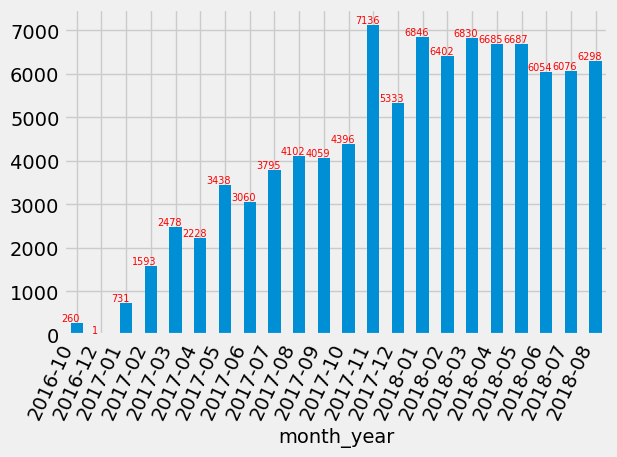

In [45]:
plt.style.use('fivethirtyeight') 
graph = df.groupby(['month_year']).size().plot(kind = "bar")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()),
                    ha='center', va='bottom',
                    color= 'red', fontsize = 7)
plt.xticks(rotation=65, ha='right')
plt.tight_layout()

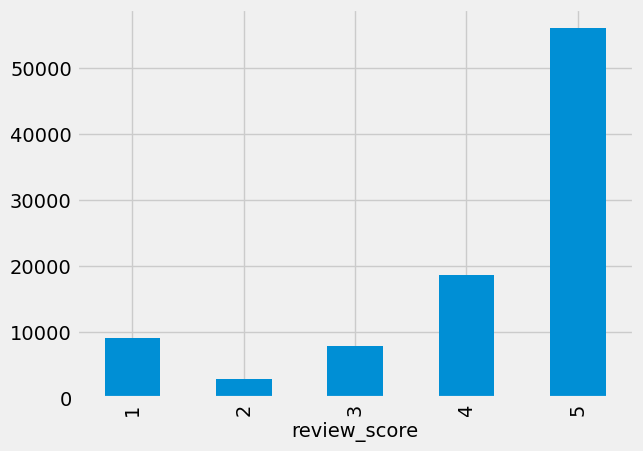

In [46]:
df.groupby(['review_score']).size().plot(kind = "bar");

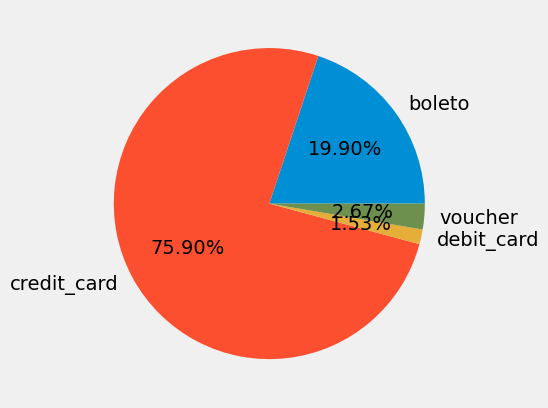

In [47]:
df.groupby(['payment_type']).size().plot(kind = "pie", autopct='%1.2f%%');

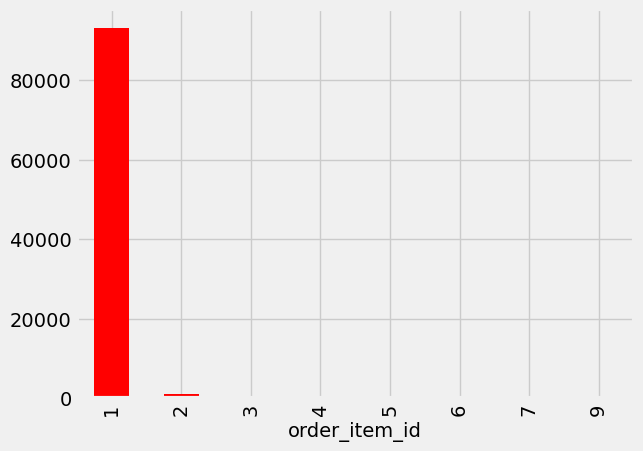

In [48]:
df.groupby(['order_item_id']).size().plot(kind = "bar", color='red');

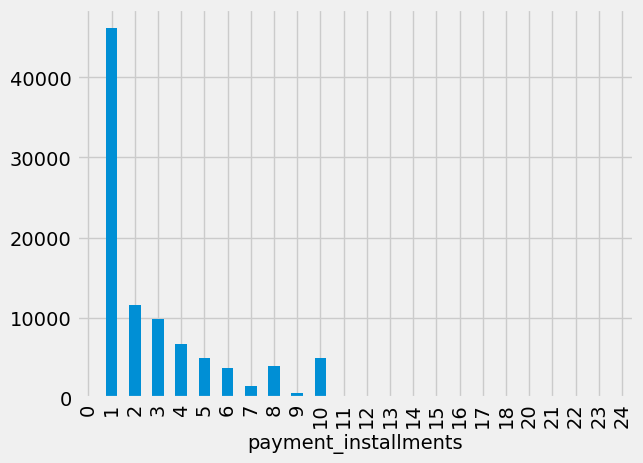

In [49]:
df.groupby(['payment_installments']).size().plot(kind = "bar");

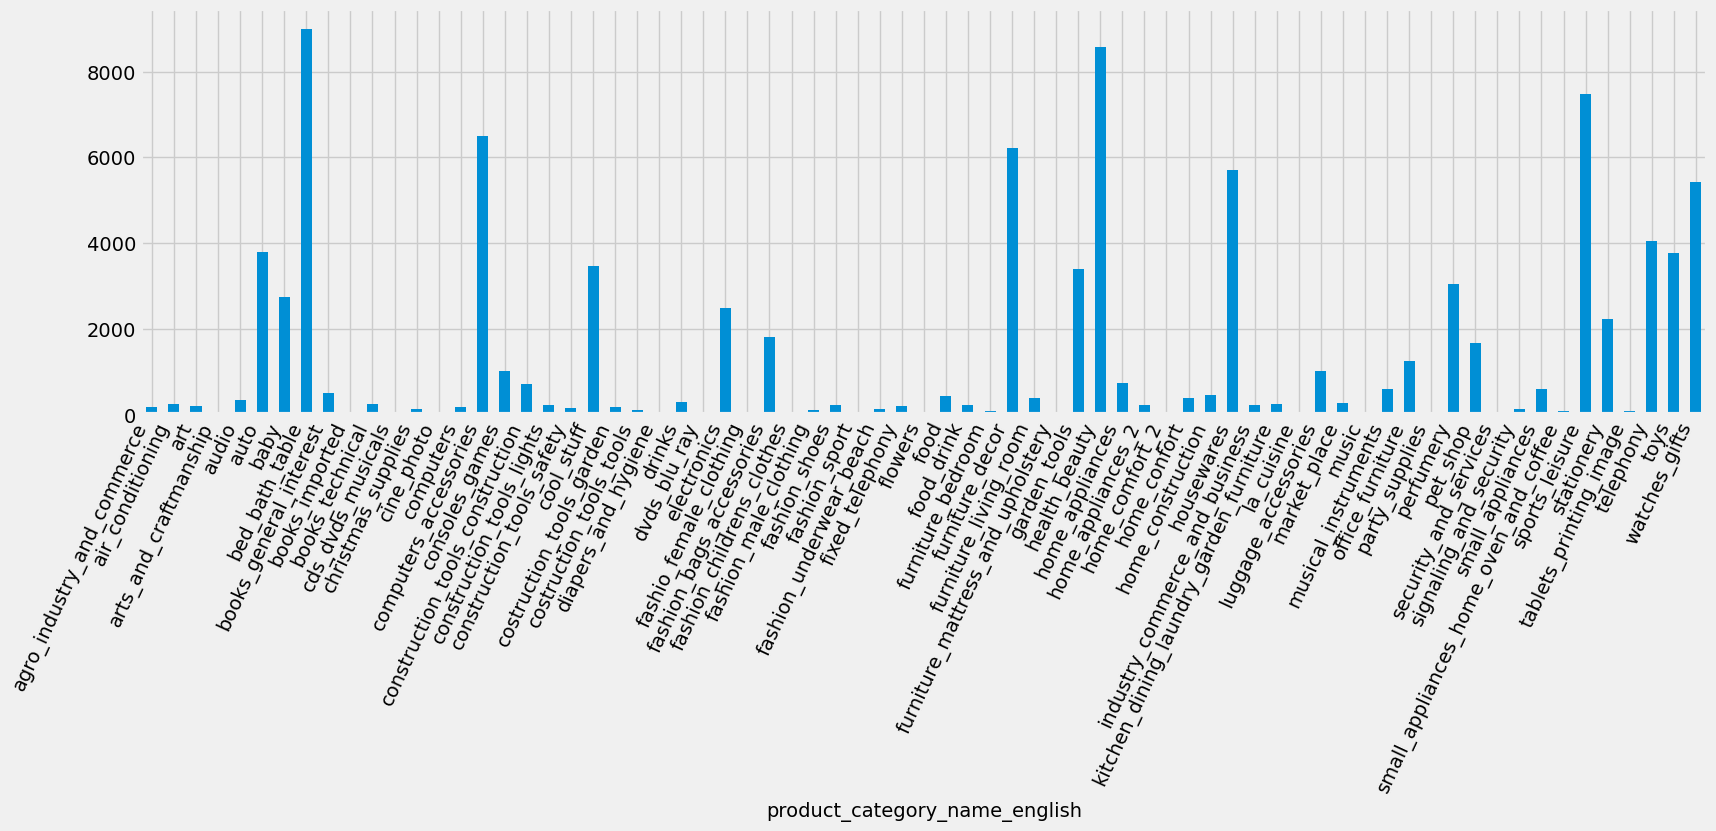

In [50]:
df.groupby(['product_category_name_english']).size().plot(kind = "bar", figsize=(18,5))
plt.xticks(rotation=65, ha='right');

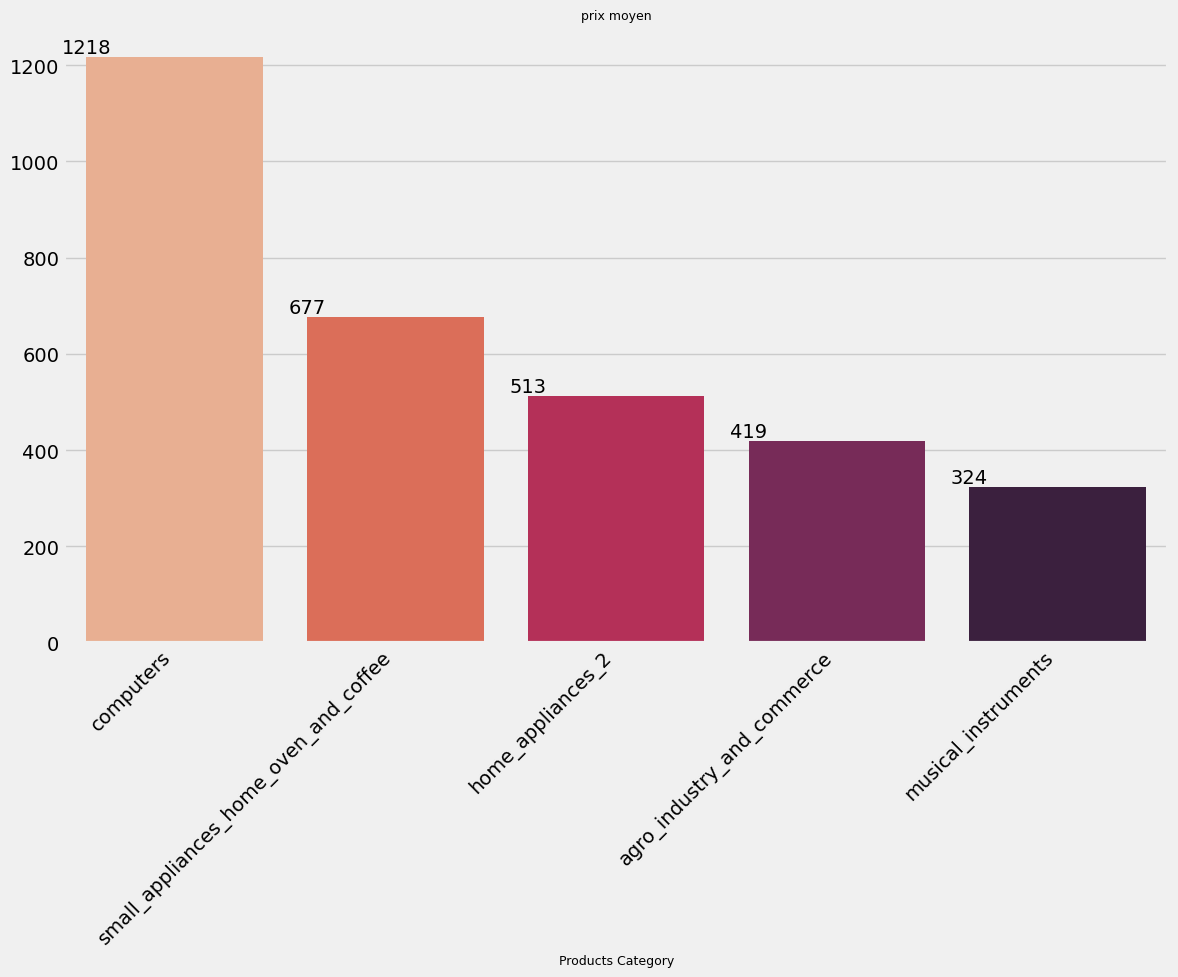

In [51]:
plt.figure(figsize=(12, 10))
df_price_cat = df.groupby('product_category_name_english')['payment_value'].mean().sort_values(ascending = False).head(5)
pal = sns.color_palette('rocket_r', len(df_price_cat))
graph = sns.barplot(x=df_price_cat.index, y=df_price_cat.values, palette=pal)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', )  
plt.title('prix moyen', size=9)
plt.xlabel('Products Category',size=9)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


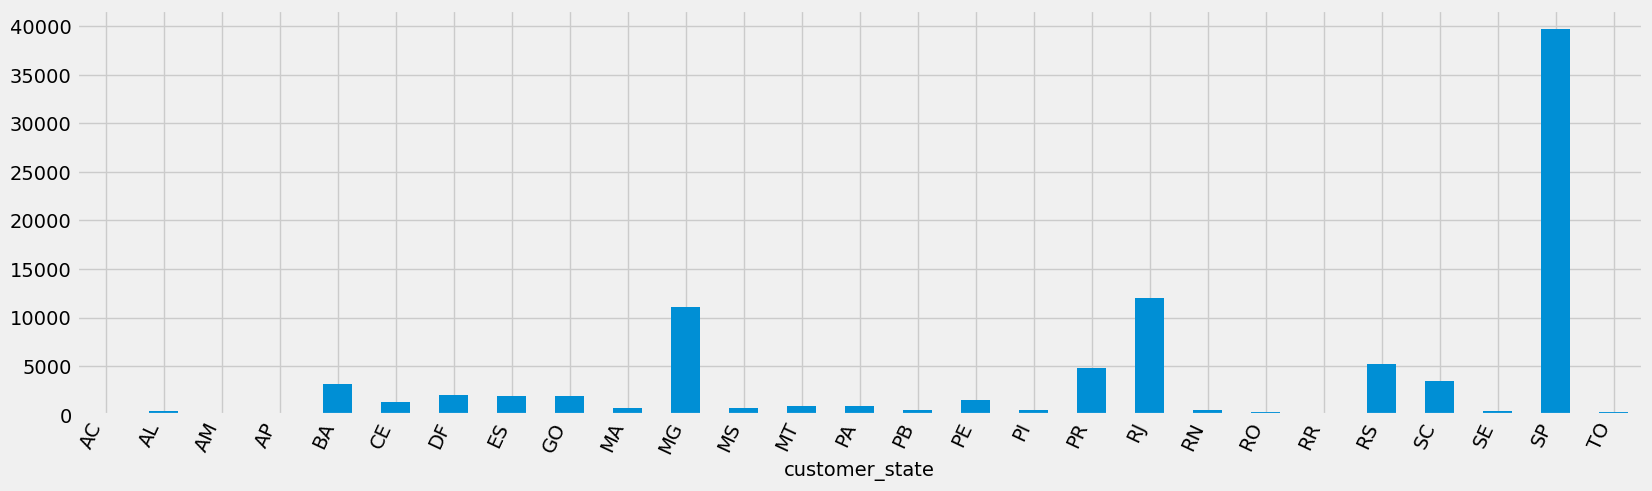

In [52]:
df.groupby(['customer_state']).size().plot(kind = "bar", figsize=(18,5))
plt.xticks(rotation=65, ha='right');

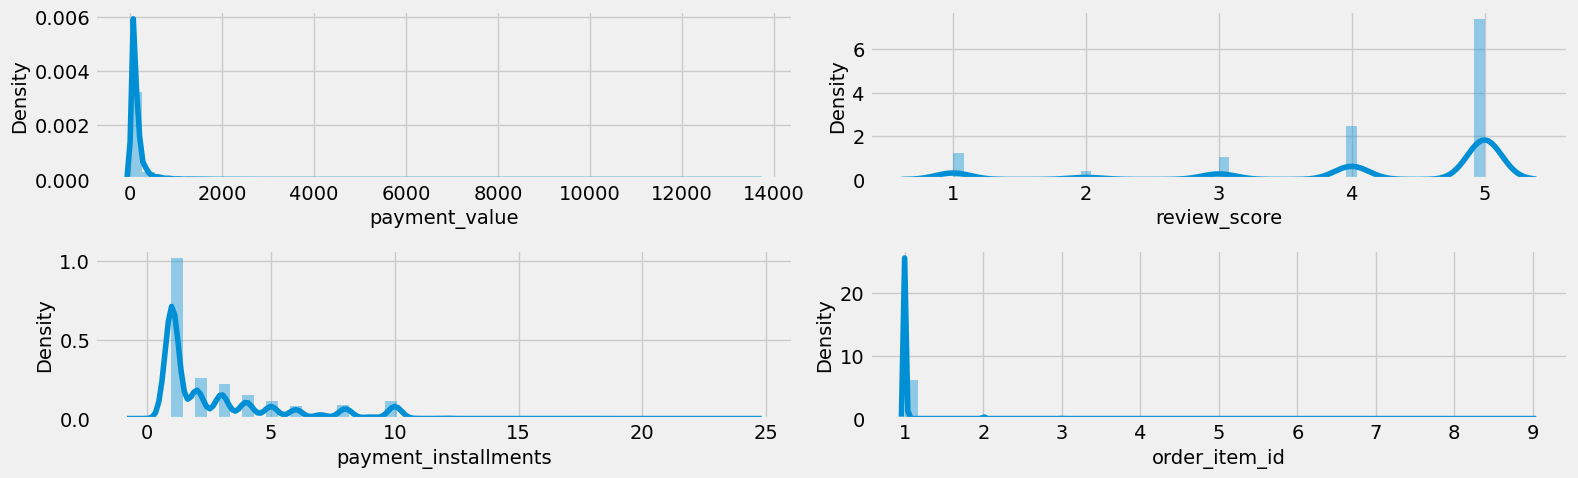

In [53]:
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(df['payment_value'])
plt.subplot(2,2,2)
sns.distplot(df['review_score'])
plt.subplot(2,2,3)
sns.distplot(df['payment_installments'])
plt.subplot(2,2,4)
sns.distplot(df['order_item_id'])
plt.tight_layout()
plt.show()

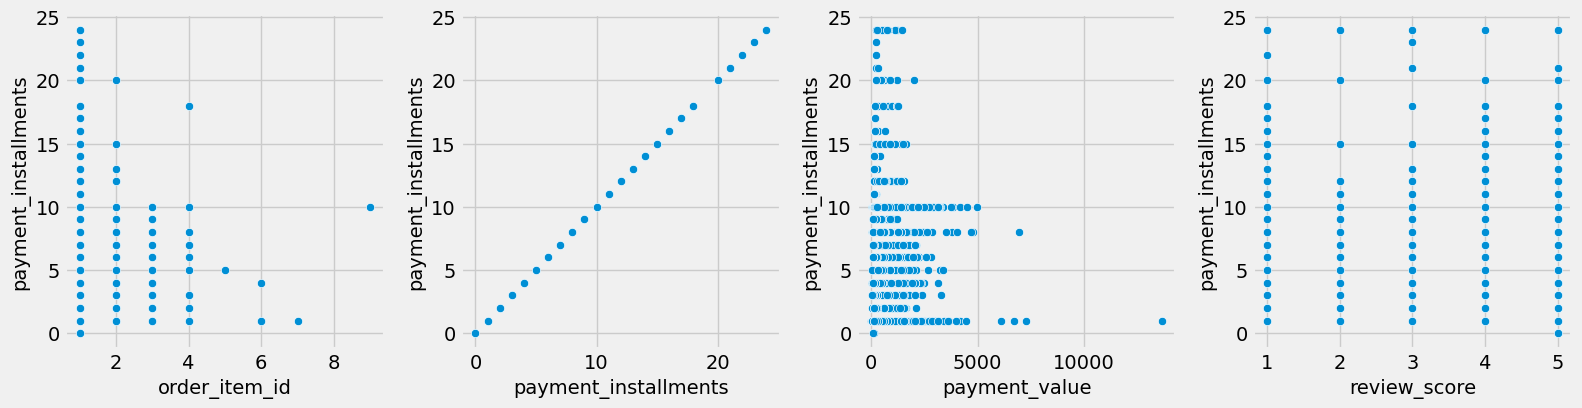

In [54]:
Z= df.select_dtypes(include='number')
plt.figure(figsize = (20, 20))
plotnumber = 1

for column in Z:
    if plotnumber <= 20:
        ax = plt.subplot(5, 5, plotnumber)
        sns.scatterplot(x = Z[column], y = Z['payment_installments'])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

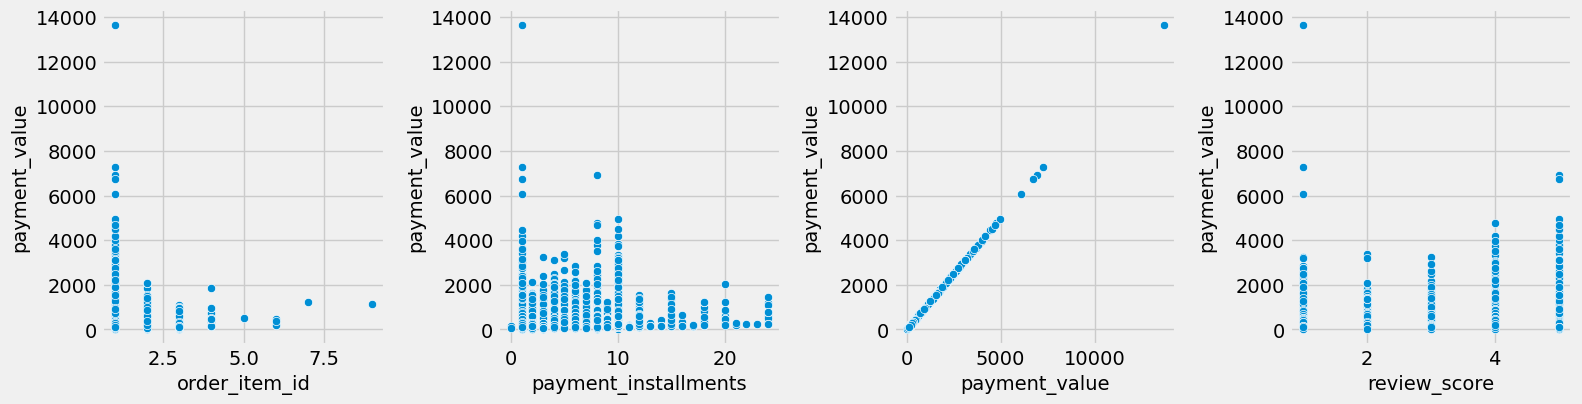

In [55]:

plt.figure(figsize = (20, 20))
plotnumber = 1

for column in Z:
    if plotnumber <= 20:
        ax = plt.subplot(5, 5, plotnumber)
        sns.scatterplot(x = Z[column], y = Z['payment_value'])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

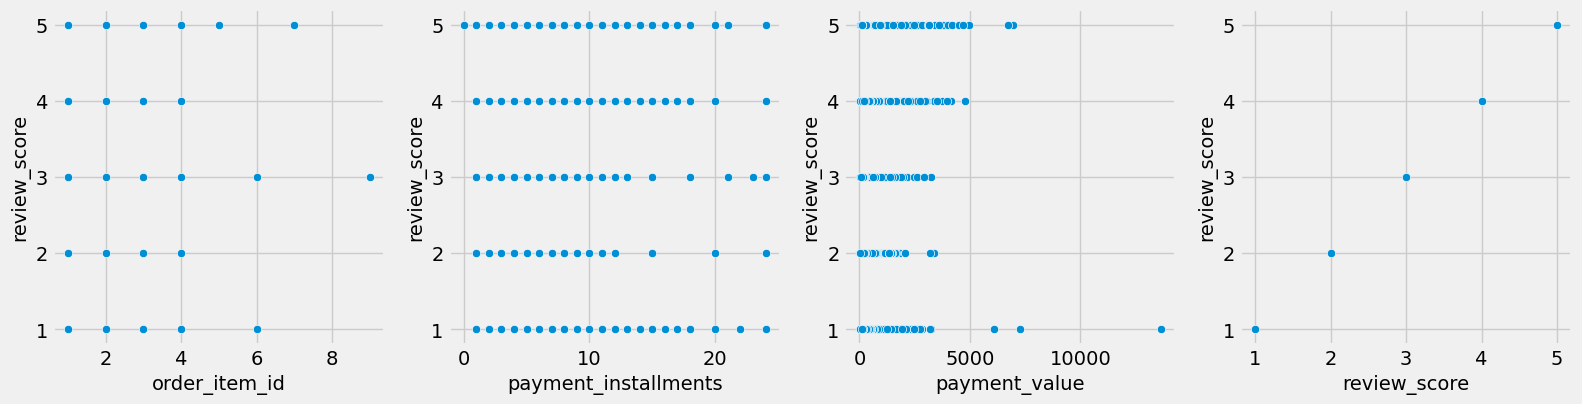

In [56]:
plt.figure(figsize = (20, 20))
plotnumber = 1

for column in Z:
    if plotnumber <= 20:
        ax = plt.subplot(5, 5, plotnumber)
        sns.scatterplot(x = Z[column], y = Z['review_score'])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

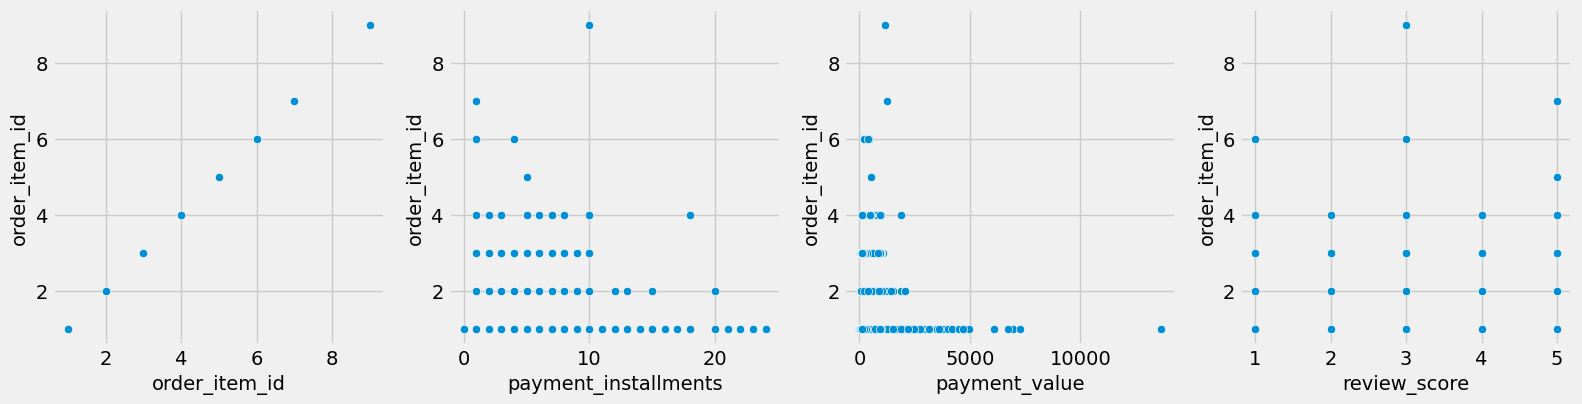

In [57]:
plt.figure(figsize = (20, 20))
plotnumber = 1

for column in Z:
    if plotnumber <= 20:
        ax = plt.subplot(5, 5, plotnumber)
        sns.scatterplot(x = Z[column], y = Z['order_item_id'])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

### Analyse multivariée

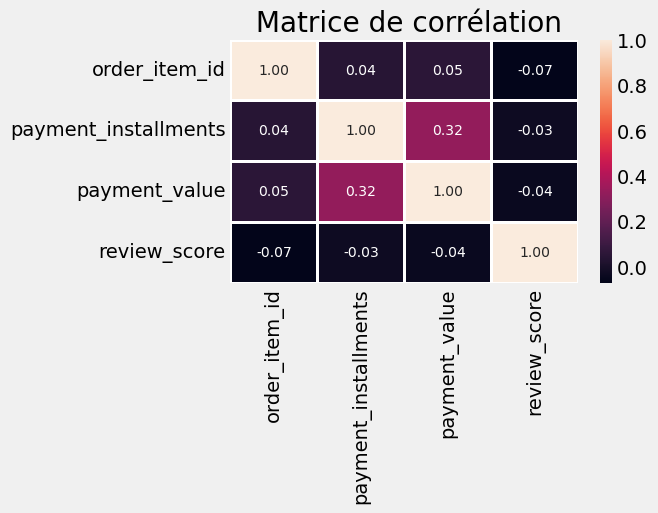

In [58]:
plt.figure(figsize=(5,3)) 
sns.heatmap(df.corr(),annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1) 
plt.title(' Matrice de corrélation')
plt.show()

In [59]:
df.to_csv(r'C:\Users\Z9220403\Desktop\P5\my_df.csv', index=False)